### Задача uplift-моделирования

In [1]:
%matplotlib inline

import pandas as pd; pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split


1. скачать набор данных маркетинговых кампаний отсюда https://www.kaggle.com/davinwijaya/customer-retention

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
path = '/gdrive/MyDrive/MLBI/lesson_4/'

In [17]:
df = pd.read_csv(path+"data.csv")

In [18]:
df.head()

recency  history  used_discount  used_bogo   zip_code  is_referral channel  \
0       10   142.44              1          0  Surburban            0   Phone   
1        6   329.08              1          1      Rural            1     Web   
2        7   180.65              0          1  Surburban            1     Web   
3        9   675.83              1          0      Rural            1     Web   
4        2    45.34              1          0      Urban            0     Web   

             offer  conversion  
0  Buy One Get One           0  
1         No Offer           0  
2  Buy One Get One           0  
3         Discount           0  
4  Buy One Get One           0

2. там поле conversion - это целевая переменная, а offer - коммуникация. Переименовать поля (conversion -> target, offer -> treatment) и привести поле treatment к бинарному виду (1 или 0, т.е было какое-то предложение или нет) - значение No Offer означает отсутствие коммуникации, а все остальные - наличие.

In [19]:
df.rename(columns={'conversion': 'target', 'offer': 'treatment'}, inplace=True)

In [20]:
df.head()

recency  history  used_discount  used_bogo   zip_code  is_referral channel  \
0       10   142.44              1          0  Surburban            0   Phone   
1        6   329.08              1          1      Rural            1     Web   
2        7   180.65              0          1  Surburban            1     Web   
3        9   675.83              1          0      Rural            1     Web   
4        2    45.34              1          0      Urban            0     Web   

         treatment  target  
0  Buy One Get One       0  
1         No Offer       0  
2  Buy One Get One       0  
3         Discount       0  
4  Buy One Get One       0

In [21]:
df['treatment'].value_counts()

Buy One Get One    21387
Discount           21307
No Offer           21306
Name: treatment, dtype: int64

In [22]:
binary_to_numbers = {'No Offer': 0, 'Buy One Get One': 1, 'Discount': 1}

df['treatment'] = df['treatment'].replace(binary_to_numbers)

In [23]:
df['treatment'].value_counts()

1    42694
0    21306
Name: treatment, dtype: int64

In [24]:
df = pd.get_dummies(df)
df.head()

recency  history  used_discount  used_bogo  is_referral  treatment  target  \
0       10   142.44              1          0            0          1       0   
1        6   329.08              1          1            1          0       0   
2        7   180.65              0          1            1          1       0   
3        9   675.83              1          0            1          1       0   
4        2    45.34              1          0            0          1       0   

   zip_code_Rural  zip_code_Surburban  zip_code_Urban  channel_Multichannel  \
0               0                   1               0                     0   
1               1                   0               0                     0   
2               0                   1               0                     0   
3               1                   0               0                     0   
4               0                   0               1                     0   

   channel_Phone  channel_Web  
0              1            0  
1              0            1  
2              0            1  
3              0            1  
4              0            1

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   recency               64000 non-null  int64  
 1   history               64000 non-null  float64
 2   used_discount         64000 non-null  int64  
 3   used_bogo             64000 non-null  int64  
 4   is_referral           64000 non-null  int64  
 5   treatment             64000 non-null  int64  
 6   target                64000 non-null  int64  
 7   zip_code_Rural        64000 non-null  uint8  
 8   zip_code_Surburban    64000 non-null  uint8  
 9   zip_code_Urban        64000 non-null  uint8  
 10  channel_Multichannel  64000 non-null  uint8  
 11  channel_Phone         64000 non-null  uint8  
 12  channel_Web           64000 non-null  uint8  
dtypes: float64(1), int64(6), uint8(6)
memory usage: 3.8 MB


3. сделать разбиение набора данных не тренировочную и тестовую выборки

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'],
                                                    test_size=0.3,
                                                    random_state=1,
                                                    )

In [27]:
treat_train = X_train['treatment']
X_train = X_train.drop('treatment', 1)

In [ ]:
treat_train

2527     0
42374    1
7356     1
35238    0
20434    1
        ..
32511    1
5192     0
12172    1
33003    1
62501    1
Name: treatment, Length: 44800, dtype: int64

In [28]:
X_train

recency  history  used_discount  used_bogo  is_referral  \
2527         1  1101.04              0          1            1   
42374        7   894.95              1          0            1   
7356         4    29.99              0          1            0   
35238        5   171.71              1          0            0   
20434        1   348.68              0          1            0   
...        ...      ...            ...        ...          ...   
32511        2   370.11              1          1            1   
5192        10    65.02              1          0            0   
12172       10    78.83              1          0            0   
33003        1    31.51              0          1            0   
62501        9   153.11              0          1            0   

       zip_code_Rural  zip_code_Surburban  zip_code_Urban  \
2527                0                   1               0   
42374               0                   1               0   
7356                0                   0               1   
35238               1                   0               0   
20434               0                   0               1   
...               ...                 ...             ...   
32511               1                   0               0   
5192                0                   0               1   
12172               0                   0               1   
33003               0                   1               0   
62501               0                   1               0   

       channel_Multichannel  channel_Phone  channel_Web  
2527                      0              1            0  
42374                     0              1            0  
7356                      0              1            0  
35238                     0              1            0  
20434                     0              1            0  
...                     ...            ...          ...  
32511                     0              0            1  
5192                      0              0            1  
12172                     0              0            1  
33003                     0              1            0  
62501                     0              1            0  

[44800 rows x 11 columns]

In [29]:
y_train

2527     0
42374    0
7356     0
35238    0
20434    0
        ..
32511    0
5192     0
12172    0
33003    0
62501    0
Name: target, Length: 44800, dtype: int64

In [30]:
treat_test = X_test['treatment']
X_test = X_test.drop('treatment', 1)

In [31]:
treat_test

16402    1
62020    0
49523    0
12502    0
63370    1
        ..
51575    1
24161    1
50768    1
14507    1
52528    1
Name: treatment, Length: 19200, dtype: int64

In [32]:
X_test

recency  history  used_discount  used_bogo  is_referral  \
16402        5   126.97              0          1            1   
62020        5   107.61              1          0            0   
49523        3   879.28              0          1            1   
12502        7   591.35              1          0            1   
63370       11   107.35              0          1            1   
...        ...      ...            ...        ...          ...   
51575        6   598.79              1          0            1   
24161        1   317.70              0          1            0   
50768        4   117.74              1          0            0   
14507        2   171.05              0          1            0   
52528       12   109.02              0          1            1   

       zip_code_Rural  zip_code_Surburban  zip_code_Urban  \
16402               0                   1               0   
62020               0                   1               0   
49523               0                   0               1   
12502               0                   1               0   
63370               0                   0               1   
...               ...                 ...             ...   
51575               0                   0               1   
24161               0                   1               0   
50768               0                   1               0   
14507               0                   0               1   
52528               1                   0               0   

       channel_Multichannel  channel_Phone  channel_Web  
16402                     0              0            1  
62020                     0              1            0  
49523                     0              0            1  
12502                     0              0            1  
63370                     0              0            1  
...                     ...            ...          ...  
51575                     0              1            0  
24161                     0              0            1  
50768                     0              1            0  
14507                     0              1            0  
52528                     0              0            1  

[19200 rows x 11 columns]

In [33]:
y_test

16402    0
62020    0
49523    0
12502    1
63370    0
        ..
51575    0
24161    1
50768    1
14507    0
52528    0
Name: target, Length: 19200, dtype: int64

4. сделать feature engineering на ваше усмотрение (допускается свобода выбора методов)

In [34]:
models_results = {
    'approach': [],
    'uplift@30%': [],
    'uplift@20%': [],
    'uplift@10%': []
    }

5. провести uplift-моделирование 3 способами: одна модель с признаком коммуникации (S learner), модель с трансформацией таргета (трансформация классов п. 2. 1) и вариант с двумя независимыми моделями

In [36]:
!pip install scikit-uplift


In [38]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 27 kB/s 


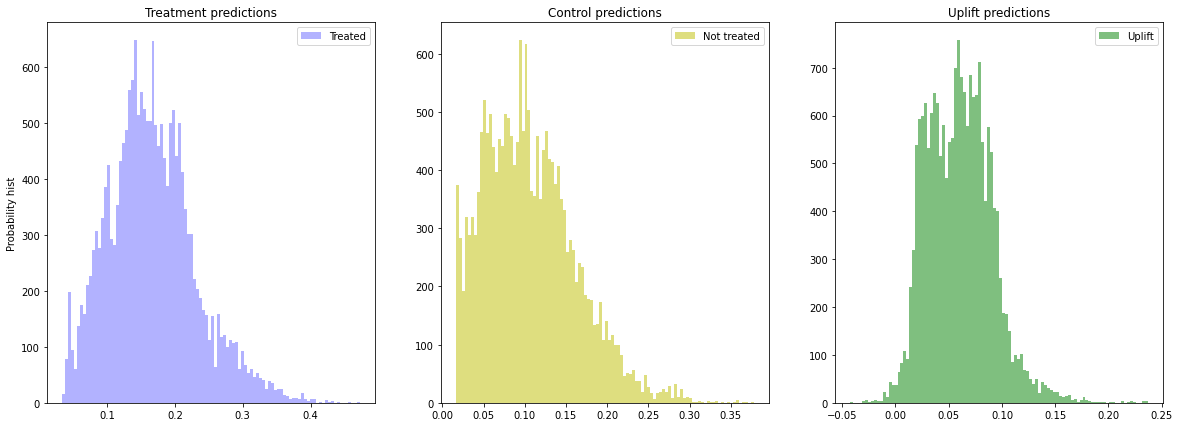

In [39]:
# Инструкция по установке пакета: https://github.com/maks-sh/scikit-uplift
# Ссылка на документацию: https://scikit-uplift.readthedocs.io/en/latest/
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel

# sklift поддерживает любые модели, 
# которые удовлетворяют соглашениями scikit-learn
# Для примера воспользуемся catboost
from catboost import CatBoostClassifier


sm = SoloModel(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit(X_train, y_train, treat_train, estimator_fit_params=None)

uplift_sm = sm.predict(X_test)

sm_score = uplift_at_k(y_true=y_test, uplift=uplift_sm, treatment=treat_test, strategy='by_group', k=0.3)
sm_score_20 = uplift_at_k(y_true=y_test, uplift=uplift_sm, treatment=treat_test, strategy='by_group', k=0.2)
sm_score_10 = uplift_at_k(y_true=y_test, uplift=uplift_sm, treatment=treat_test, strategy='by_group', k=0.1)

models_results['approach'].append('SoloModel')
models_results['uplift@30%'].append(sm_score)
models_results['uplift@20%'].append(sm_score_20)
models_results['uplift@10%'].append(sm_score_10)

# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds);

In [40]:
from sklift.models import ClassTransformation


ct = ClassTransformation(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
ct = ct.fit(X_train, y_train, treat_train, estimator_fit_params=None)

uplift_ct = ct.predict(X_test)

ct_score = uplift_at_k(y_true=y_test, uplift=uplift_ct, treatment=treat_test, strategy='by_group', k=0.3)
ct_score_20 = uplift_at_k(y_true=y_test, uplift=uplift_ct, treatment=treat_test, strategy='by_group', k=0.2)
ct_score_10 = uplift_at_k(y_true=y_test, uplift=uplift_ct, treatment=treat_test, strategy='by_group', k=0.1)



models_results['approach'].append('ClassTransformation')
models_results['uplift@30%'].append(ct_score)
models_results['uplift@20%'].append(ct_score_20)
models_results['uplift@10%'].append(ct_score_10)


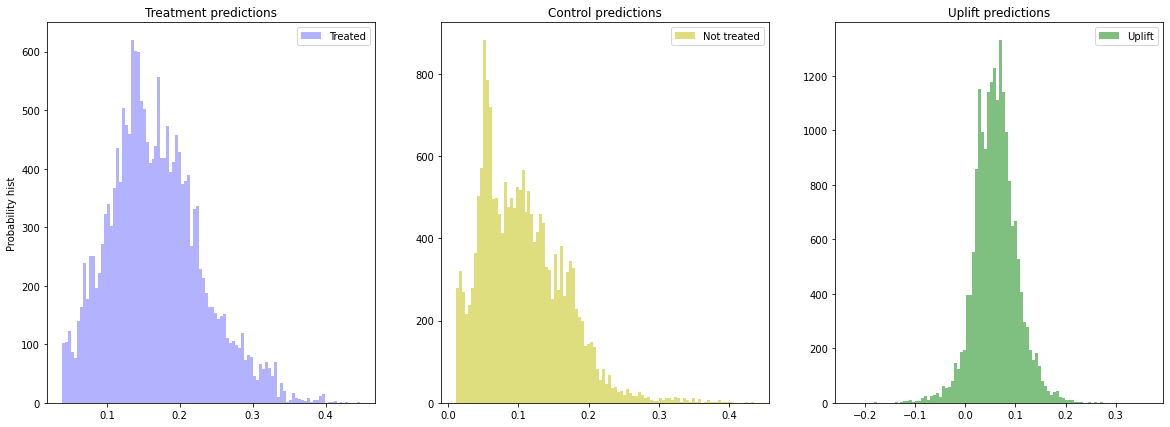

In [41]:
from sklift.models import TwoModels


tm = TwoModels(
    estimator_trmnt=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    method='vanilla'
)
tm = tm.fit(
    X_train, y_train, treat_train,
    estimator_trmnt_fit_params=None, 
    estimator_ctrl_fit_params=None
)

uplift_tm = tm.predict(X_test)

tm_score = uplift_at_k(y_true=y_test, uplift=uplift_tm, treatment=treat_test, strategy='by_group', k=0.3)
tm_score_20 = uplift_at_k(y_true=y_test, uplift=uplift_tm, treatment=treat_test, strategy='by_group', k=0.2)
tm_score_10 = uplift_at_k(y_true=y_test, uplift=uplift_tm, treatment=treat_test, strategy='by_group', k=0.1)

models_results['approach'].append('TwoModels')
models_results['uplift@30%'].append(tm_score)
models_results['uplift@20%'].append(tm_score_20)
models_results['uplift@10%'].append(tm_score_10)


plot_uplift_preds(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_);

6. в конце вывести единую таблицу сравнения метрик uplift@10%, uplift@20% этих 3 моделей

In [42]:
pd.DataFrame(data=models_results)

approach  uplift@30%  uplift@20%  uplift@10%
0            SoloModel    0.076721    0.080164    0.096075
1  ClassTransformation    0.065956    0.078795    0.083598
2            TwoModels    0.076220    0.075173    0.089098

7. построить модель UpliftTreeClassifier и попытаться описать словами полученное дерево

In [43]:
!pip install causalml

     |████████████████████████████████| 243 kB 3.0 MB/s 
     |████████████████████████████████| 326 kB 26.9 MB/s 
     |████████████████████████████████| 1.8 MB 48.0 MB/s 
     |████████████████████████████████| 678 kB 46.5 MB/s 
  Created wheel for causalml: filename=causalml-0.11.1-cp37-cp37m-linux_x86_64.whl size=496045 sha256=3c330bf94a9af849b21494fed31164ef19ab47609fde07d9e0a21485f3e541b9
  Stored in directory: /root/.cache/pip/wheels/38/37/65/b1ce7cd05b4de8f6e7a7714750c907b0d28fb93880d52e8a29
  Created wheel for shap: filename=shap-0.37.0-cp37-cp37m-linux_x86_64.whl size=465072 sha256=ebd295f78336e02c3defa484255c2c855ca494e62eafa181498ac8fad285c552
  Stored in directory: /root/.cache/pip/wheels/df/b8/18/2c0a6105152e62dd9a7cf47b5110b9cedb0c8739babdef64b7
Successfully built causalml shap


In [48]:
features = [col for col in X_train]

In [50]:
%%time
from IPython.display import Image
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

uplift_model = UpliftTreeClassifier(max_depth=8, min_samples_leaf=200, min_samples_treatment=50,
                                    n_reg=100, evaluationFunction='KL', control_name='control')

uplift_model.fit(X_train.values,
                 treatment=treat_train.map({1: 'treatment1', 0: 'control'}).values,
                 y=y_train)

graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, features)
Image(graph.create_png())

CPU times: user 8.22 s, sys: 133 ms, total: 8.35 s
Wall time: 11.3 s


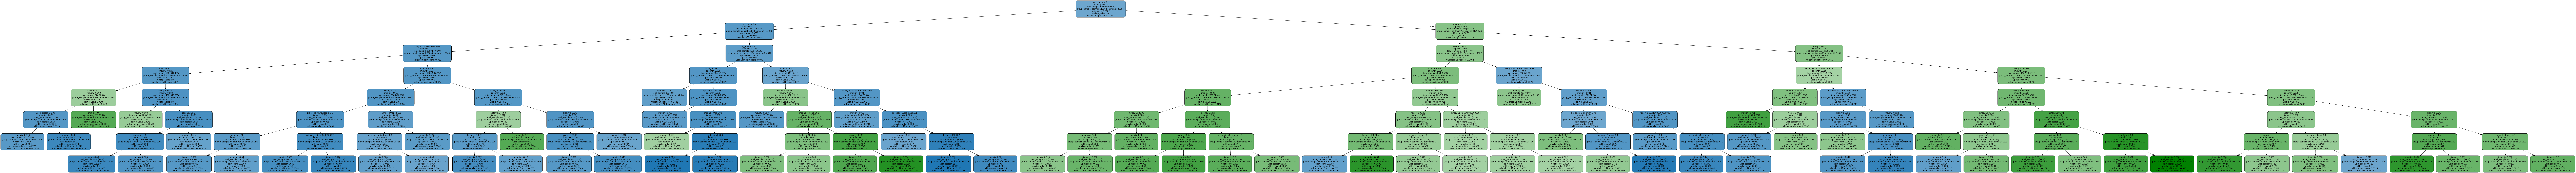

In [51]:
graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, features)
Image(graph.create_png())

Построенные деревья будут измерять значения uplift внутри каждого листа опираясь на группировку объектов, т.е. в листьях будут собираться походие объекты и им будет высталяться значение uplift. В главном узле происходит разбиение по вопросу used_bogo >=0, в листе находятся все объекты (44800), uplift, который мы наблюдаем равен = 0,0602. В каждом узле происходит взвешивание значения uplift и p-value, которое характеризует значение uplift, как статистически значимое. Т.е. чем ниже значение p-value, тем более статистически значимый uplift мы получили. Далее деревья делятся и доходят до терминальных узлов (конечных листьев). В каждом таком листе есть информация не только об общем количестве объектов (tota_sample), но и о количестве объектов в подгруппах treatment и cjntrol (т.е. в группах где было воздействие и нет). Так же присутствует значение p_value, характеризующее статистическую значимость полусенного uplift. И если значение mean control< teratment это говорит о том что группа, где применялось воздействие выглядит лучше, че где оно не применялось.

In [56]:
from sklift.metrics import uplift_by_percentile
uplift_by_percentile(y_test, uplift_sm, treat_test, strategy = 'overall', total=True, std=True, bins=10)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


n_treatment  n_control  response_rate_treatment  \
percentile                                                    
0-10               1267        653                 0.230466   
10-20              1283        637                 0.184723   
20-30              1260        660                 0.192063   
30-40              1280        640                 0.160156   
40-50              1269        651                 0.151300   
50-60              1257        663                 0.172633   
60-70              1279        641                 0.153245   
70-80              1267        653                 0.151539   
80-90              1262        658                 0.127575   
90-100             1276        644                 0.155172   
total             12700       6500                 0.167874   

            response_rate_control    uplift  std_treatment  std_control  \
percentile                                                                
0-10                     0.133231  0.097234       0.011831     0.013298   
10-20                    0.119309  0.065414       0.010834     0.012843   
20-30                    0.124242  0.067821       0.011098     0.012840   
30-40                    0.101562  0.058594       0.010251     0.011940   
40-50                    0.113671  0.037629       0.010059     0.012440   
50-60                    0.076923  0.095710       0.010660     0.010349   
60-70                    0.107644  0.045600       0.010072     0.012242   
70-80                    0.108729  0.042810       0.010074     0.012182   
80-90                    0.071429  0.056147       0.009391     0.010040   
90-100                   0.097826  0.057346       0.010136     0.011707   
total                    0.105385  0.062489       0.104406     0.119881   

            std_uplift  
percentile              
0-10          0.017800  
10-20         0.016803  
20-30         0.016971  
30-40         0.015737  
40-50         0.015998  
50-60         0.014857  
60-70         0.015853  
70-80         0.015808  
80-90         0.013747  
90-100        0.015485  
total         0.159059

In [58]:
from sklift.viz import plot_uplift_by_percentile

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efeb215e490>,
      dtype=object)

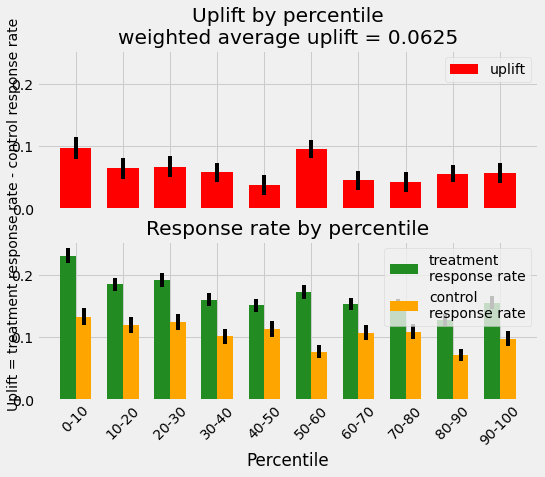

In [59]:
plot_uplift_by_percentile(y_test, uplift_sm, treat_test, strategy = 'overall', kind='bar')